In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
IMG_size=150
BATCH_SIZE=32

### Data Generation 

In [3]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
train_generator=train_datagen.flow_from_directory('dataset_cnn/Training',
                                                  target_size=(IMG_size,IMG_size),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary')

Found 5600 images belonging to 2 classes.


In [5]:
val_generator=val_datagen.flow_from_directory('dataset_cnn/Testing',
                                              target_size=(IMG_size,IMG_size),
                                              batch_size=BATCH_SIZE,
                                              class_mode='binary')

Found 1600 images belonging to 2 classes.


### CNN Model Creation 

In [7]:
# model = Sequential([
#     Conv2D(32,(3,3), activation='relu',input_shape=(IMG_size,IMG_size,3)),
#     MaxPooling2D(2,2),
#     Conv2D(64,(3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(128,(3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])
model = Sequential([
    
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_size, IMG_size, 3)),
    #The model will learn 32 different feature detectors
    # Conv2D = 2D Convolution layer
    #The filter scans a 3 × 3 pixel area at a time. Small enough to detect fine details
    MaxPooling2D(2,2),
    # Pick the maximum value and Move to next region

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
175/175 [==============================] - 128s 735ms/step - loss: 0.2063 - accuracy: 0.9273 - val_loss: 0.7376 - val_accuracy: 0.7406
Epoch 2/25
175/175 [==============================] - 57s 327ms/step - loss: 0.1436 - accuracy: 0.9486 - val_loss: 0.5763 - val_accuracy: 0.7287
Epoch 3/25
175/175 [==============================] - 58s 330ms/step - loss: 0.1356 - accuracy: 0.9525 - val_loss: 0.2532 - val_accuracy: 0.8869
Epoch 4/25
175/175 [==============================] - 58s 330ms/step - loss: 0.1047 - accuracy: 0.9639 - val_loss: 0.3001 - val_accuracy: 0.8875
Epoch 5/25
175/175 [==============================] - 58s 331ms/step - loss: 0.0965 - accuracy: 0.9657 - val_loss: 0.1930 - val_accuracy: 0.9250
Epoch 6/25
175/175 [==============================] - 58s 333ms/step - loss: 0.0918 - accuracy: 0.9686 - val_loss: 0.2230 - val_accuracy: 0.8963
Epoch 7/25
175/175 [==============================] - 60s 340ms/step - loss: 0.0781 - accuracy: 0.9718 - val_loss: 0.2548 - val_a

In [15]:
model.save("Tumour_Detection.h5")

c:\main_CNN\venv_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


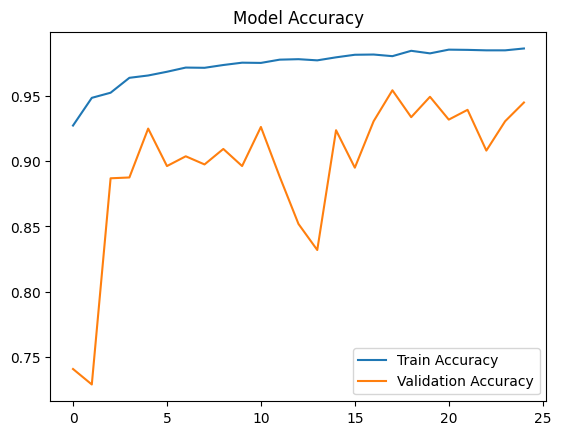

In [16]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()